In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import spearmanr, pearsonr
import seaborn as sns
from scipy.stats import gaussian_kde
import oddt
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from oddt.scoring import scorer, ensemble_model
from oddt.utils import method_caller
from oddt.scoring.models.regressors import neuralnetwork
import xgboost as xgb
from sklearn.linear_model import SGDRegressor
from sklearn.inspection import permutation_importance
import shap
from collections import defaultdict
import pandas as pd
import numpy as np
import oddt
from oddt import toolkit
from oddt.scoring.descriptors import close_contacts_descriptor, oddt_vina_descriptor

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

In [3]:
features = pd.read_csv("/pubhome/hzhu02/GPSF/generalization_benchmark/datasets/descriptors/refine_general_features.csv")
vina_title =['vina_gauss1_x',
            'vina_gauss2_x',
            'vina_repulsion_x',
            'vina_hydrophobic_x',
            'vina_hydrogen_x',
            'vina_num_rotors']
rf_v1_title = features.columns.tolist()[2:38]

feature_list = vina_title+rf_v1_title
## load pdb contain cluster info
all_pdb = pd.read_csv("/pubhome/hzhu02/GPSF/dataset/INDEX/split/hmm/jackhmmer/general/general_refine_classified.csv")

In [4]:
## the order is right
feature_list

['vina_gauss1_x',
 'vina_gauss2_x',
 'vina_repulsion_x',
 'vina_hydrophobic_x',
 'vina_hydrogen_x',
 'vina_num_rotors',
 '6.6',
 '7.6',
 '8.6',
 '16.6',
 '6.7',
 '7.7',
 '8.7',
 '16.7',
 '6.8',
 '7.8',
 '8.8',
 '16.8',
 '6.9',
 '7.9',
 '8.9',
 '16.9',
 '6.15',
 '7.15',
 '8.15',
 '16.15',
 '6.16',
 '7.16',
 '8.16',
 '16.16',
 '6.17',
 '7.17',
 '8.17',
 '16.17',
 '6.35',
 '7.35',
 '8.35',
 '16.35',
 '6.53',
 '7.53',
 '8.53',
 '16.53']

In [5]:
## change feature names
## change 6.7-->C-N
## change vina_repulsion_x --> repulsion
change_feature_list = [item.split("_x")[0] for item in feature_list]
atom_dict = {'6':"C","7":"N","8":"O","9":"F","16":"S","15":"P","17":"Cl","35":"Br","53":"I"}
change_feature_list_new = [i.split("_")[-1] for i in change_feature_list[0:6]]

change_feature_list_new_2 = [atom_dict[i.split(".")[0]]+"-"+atom_dict[i.split(".")[1]] for i in change_feature_list[6:]]
final_names = change_feature_list_new+change_feature_list_new_2
change_name_dict = {}
for i in range(len(feature_list)):
    change_name_dict[feature_list[i]] = final_names[i]

In [6]:
change_name_dict

{'vina_gauss1_x': 'gauss1',
 'vina_gauss2_x': 'gauss2',
 'vina_repulsion_x': 'repulsion',
 'vina_hydrophobic_x': 'hydrophobic',
 'vina_hydrogen_x': 'hydrogen',
 'vina_num_rotors': 'rotors',
 '6.6': 'C-C',
 '7.6': 'N-C',
 '8.6': 'O-C',
 '16.6': 'S-C',
 '6.7': 'C-N',
 '7.7': 'N-N',
 '8.7': 'O-N',
 '16.7': 'S-N',
 '6.8': 'C-O',
 '7.8': 'N-O',
 '8.8': 'O-O',
 '16.8': 'S-O',
 '6.9': 'C-F',
 '7.9': 'N-F',
 '8.9': 'O-F',
 '16.9': 'S-F',
 '6.15': 'C-P',
 '7.15': 'N-P',
 '8.15': 'O-P',
 '16.15': 'S-P',
 '6.16': 'C-S',
 '7.16': 'N-S',
 '8.16': 'O-S',
 '16.16': 'S-S',
 '6.17': 'C-Cl',
 '7.17': 'N-Cl',
 '8.17': 'O-Cl',
 '16.17': 'S-Cl',
 '6.35': 'C-Br',
 '7.35': 'N-Br',
 '8.35': 'O-Br',
 '16.35': 'S-Br',
 '6.53': 'C-I',
 '7.53': 'N-I',
 '8.53': 'O-I',
 '16.53': 'S-I'}

In [7]:
## load explain dataset, the same data in cal_shap_value.py
i=1
with open("/pubhome/hzhu02/GPSF/generalization_benchmark/models/RF/general_3_fold/PCV/1/"+str(i)+"/best_model_VR1_RF.pkl", "rb") as f:
        model = joblib.load(f)

test_set = pd.read_csv("/pubhome/hzhu02/GPSF/generalization_benchmark/datasets/general_3_fold/PCV/1/"+str(i)+"/train.csv", header=None)
test_set.columns=['pdb','affinity']
test_set = pd.merge(test_set, features, on=['pdb','affinity'])
test_set = pd.merge(test_set, all_pdb, on=['pdb','affinity'])
pcv_training_1_shap_values = np.load("/pubhome/hzhu02/GPSF/generalization_benchmark/models/general_3_fold_summary/RF_feature/pcv_training_shap_1.npy")


In [8]:
test_set.rename(columns=change_name_dict, inplace=True)

<Figure size 1368x1296 with 0 Axes>

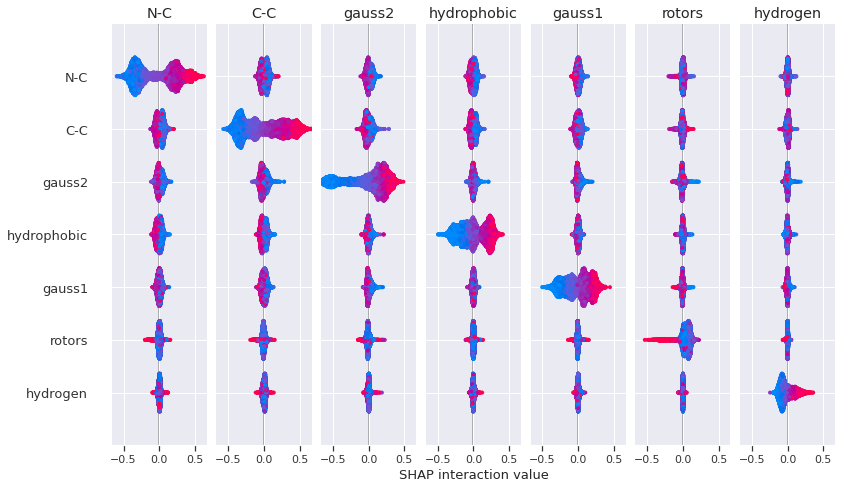

In [9]:
plt.figure(figsize=(19, 18), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
shap.summary_plot(pcv_training_1_shap_values, test_set[final_names], plot_type="bar", show=False)
plt.savefig("/pubhome/hzhu02/GPSF/generalization_benchmark/models/general_3_fold_summary/RF_feature/PCV_cluster_plot/PCV_training_1_shap.png", dpi=800, bbox_inches='tight')

Text(0.5, 1.0, 'Model=PCV')

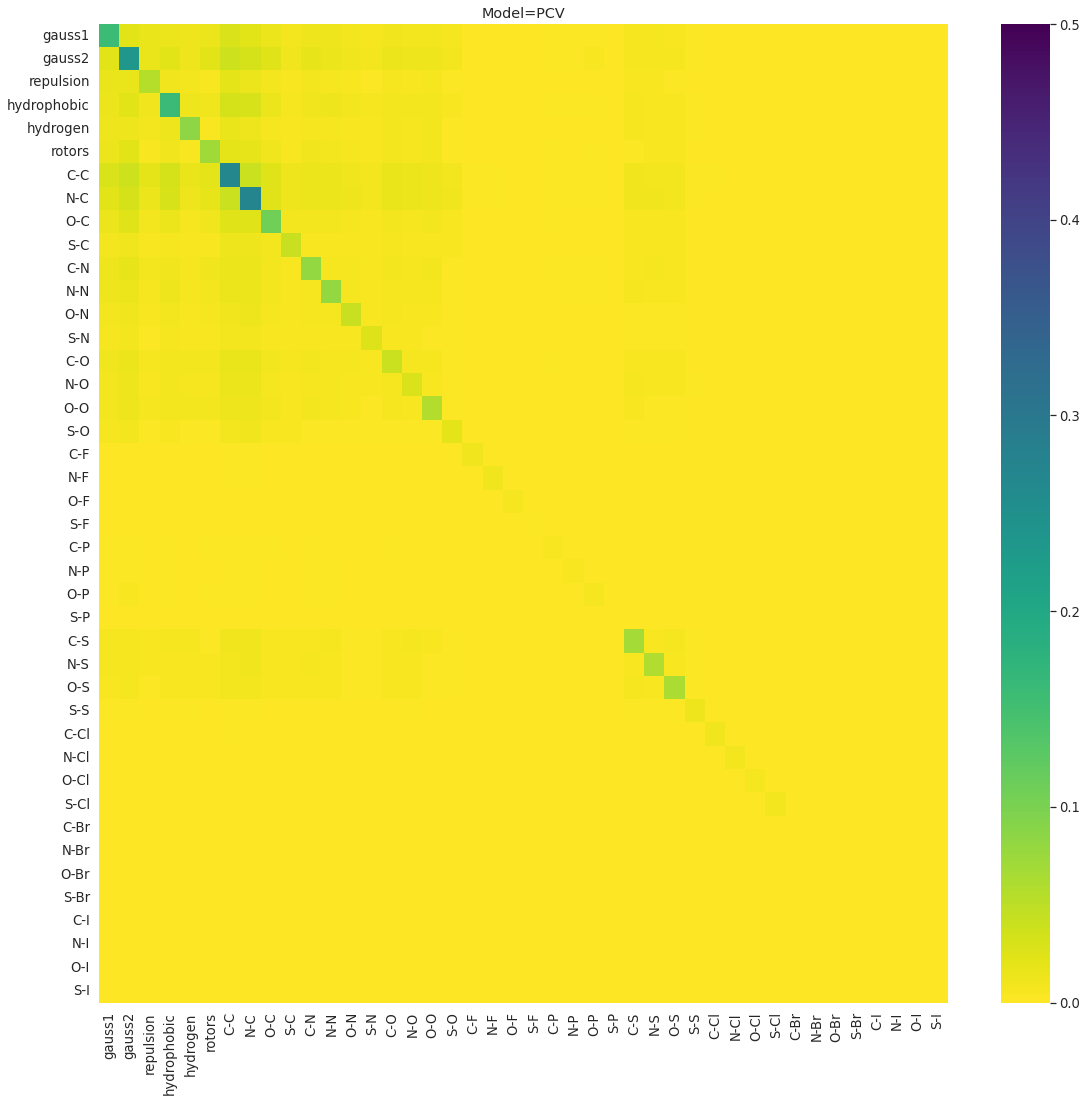

In [10]:

cm = plt.cm.get_cmap('viridis_r')
mean_shap = np.abs(pcv_training_1_shap_values).mean(0)
df = pd.DataFrame(mean_shap,index=final_names,columns=final_names)
df.where(df.values == np.diagonal(df), df.values*2, inplace=True)

plt.figure(figsize=(19, 18), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
sns.heatmap(df,cmap=cm,fmt='.3g',cbar=True,vmin=0, vmax=0.5)
plt.yticks(rotation=0) 
plt.title("Model=PCV")
plt.savefig("/pubhome/hzhu02/GPSF/generalization_benchmark/models/general_3_fold_summary/RF_feature/PCV_cluster_plot/PCV_heatmap_training_1.png", dpi=800, bbox_inches='tight')
                        

In [ ]:
## explain the specific case

In [11]:
explainer = shap.TreeExplainer(model)

note!首先注释‘/pubhome/hzhu02/miniconda3/envs/fast/lib/python3.6/site-packages/shap/plots/_waterfall.py’文件中的部分代码
line 541, 543, 553, 555-588


修改line 593 为 return ax, pl.gcf()

Text(0.5, 0, 'Binding affinity')

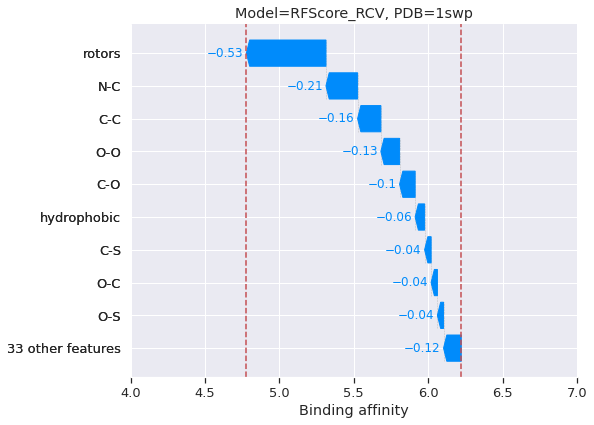

In [14]:
## the number 36 corresponds to 1swp
plt.figure(figsize=(19, 18), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
ax, _ = shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], pcv_training_1_shap_values[36].sum(1), feature_names=final_names, show=False, left_xmin=4, right_xmax=7)
ax.set_title("Model=RFScore_RCV, PDB=1swp")
# ax.axvline(x=11, ymin=0, ymax=10, ls="--", color="r")
ax.axvline(x=explainer.expected_value[0], ymin=0, ymax=10, ls="--", color="r")
ax.axvline(x=np.sum(pcv_training_1_shap_values[36].sum(1))+explainer.expected_value[0], ymin=0, ymax=10, ls="--", color="r")
# ax.annotate("E[f(x)]=6.39", (6.5, 9),fontsize=10)
# ax.annotate("Pred=9.36", (8.6, 0),fontsize=10)
# ax.annotate("Exp=11.0", (10.3, 0),fontsize=10)
ax.set_xlabel("Binding affinity")

# plt.savefig("/pubhome/hzhu02/GPSF/generalization_benchmark/models/general_3_fold_summary/RF_feature/cluster_plot/avidin/Avidin_1swp_modified_shap.png", dpi=800, bbox_inches='tight')